## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

## Reading Data 

In [3]:
data=pd.read_csv("final_unprocessed_data.csv")
print(data.shape)
data= data[(data.RIDAGEYR >= 1) & (data.RIDAGEYR <= 85)]

data.shape

(106203, 402)


(106203, 402)

In [4]:
thresh = len(data) * 0.05
data = data.dropna(thresh=thresh, axis = 1)
thresh2 = 20
data= data.dropna(thresh=thresh2, axis=0)

In [5]:
data.shape

(92492, 327)

In [6]:
Y=data['RIDAGEYR']
X=data.drop(['SEQN','RIDAGEYR'], axis=1)

In [7]:
X.head()

,LBXTR,LBXTC,LBXBAPCT,LBXHGB,LBXPLTSI,LBXRDW,LBXMC,LBXRBCSI,LBXMPSI,LBXMCHSI,...,LBXBCC,LBXPHE,LBXVB6,LBXFB,LBXPCT,LBXHP1,LBXTBA,LBXTBM,LBXTBIN,LBXTBN
0,40.0,166.0,0.5,13.7,263.0,13.1,33.7,4.80,8.2,28.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,84.0,147.0,1.0,15.3,254.0,13.7,34.4,4.54,7.1,33.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,133.0,105.0,0.8,13.9,173.0,13.9,33.6,4.47,8.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24.0,129.0,0.4,12.9,224.0,13.3,33.4,4.41,8.5,29.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,132.0,233.0,1.2,12.9,154.0,14.5,33.9,4.16,7.7,30.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
Y.head()

0    13.0
1    49.0
2    68.0
3    12.0
4    76.0
Name: RIDAGEYR, dtype: float64

## Split Data in train and test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=321)

## Creating a pipeline for preprocessing data 

In [9]:
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('std_scaler', StandardScaler())
])

In [10]:
X_train = my_pipeline.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = my_pipeline.transform(X_test)
X_test = pd.DataFrame(X_test)

## Random Forest Regressor

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [12]:
param_grid = [
   {
    'n_estimators': [25, 50, 100, 200, 400,500],
    'max_features': [1, 5, 10, 25, 50, 100],
    'bootstrap': [True, False]
    }
]

forest_reg = RandomForestRegressor()
grid_search = RandomizedSearchCV(forest_reg, param_grid , cv = 5,
                                scoring='neg_mean_squared_error',
                                n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search.best_params_

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'n_estimators': 200, 'max_features': 100, 'bootstrap': False}

In [13]:
forest_reg = RandomForestRegressor(n_estimators=200, max_features= 100, bootstrap= False,n_jobs=-1)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_features=100, n_estimators=200,
                      n_jobs=-1)

In [14]:
y_pred=forest_reg.predict(X_test)

In [15]:
mean_absolute_error(y_test, y_pred)

4.623884804584032

In [16]:
r2_score(y_test, y_pred)

0.922687419553666

## Epsilon-Support Vector Regression.

In [17]:
from sklearn.svm import SVR
model=SVR(C=1.0, epsilon=0.2)
model.fit(X_train,y_train)

SVR(epsilon=0.2)

In [18]:
pred=model.predict(X_test)

In [19]:
mean_absolute_error(y_test, pred)

8.794312794426565

In [20]:
r2_score(y_test, pred)

0.7679160961116321

## XGBoost

In [9]:
import xgboost as xgb

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=321)

In [11]:
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('std_scaler', StandardScaler())
])

In [12]:
X_train = my_pipeline.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = my_pipeline.transform(X_test)
X_test = pd.DataFrame(X_test)

X = my_pipeline.transform(X)
X = pd.DataFrame(X)

In [13]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,315,316,317,318,319,320,321,322,323,324
0,2.540447e+00,0.082540,-0.210595,1.970216,-0.454738,-0.944465,1.178098,1.428605,-0.939569,0.737754,...,6.457383e-16,0.000000,3.634466e-16,-4.300643e+00,3.313419e-15,0.000000,-2.576040e-16,3.636334e-15,1.181023e-14,3.158246e-16
1,-4.962155e-01,-0.913130,-0.210595,0.183037,-0.143474,-0.559876,0.356130,0.951161,-0.078455,-0.859193,...,6.457383e-16,0.000000,3.634466e-16,2.727931e-15,-8.719193e-01,3.162421,-2.576040e-16,3.636334e-15,1.181023e-14,3.158246e-16
2,-8.057781e-01,0.306566,-0.594077,1.308298,-0.021675,-0.713711,0.972606,0.639785,0.029185,1.106280,...,6.457383e-16,0.000000,3.634466e-16,2.727931e-15,3.313419e-15,0.000000,-2.576040e-16,3.636334e-15,1.181023e-14,3.158246e-16
3,5.651421e-01,-0.962913,0.556369,1.440682,-0.373539,-1.405972,0.150638,0.681302,-0.293733,0.983438,...,-1.731403e+00,1.835253,1.216127e+00,2.727931e-15,3.313419e-15,0.000000,-2.576040e-16,3.636334e-15,1.181023e-14,3.158246e-16
4,2.094833e-16,0.928859,-0.018854,-0.412689,2.184239,0.824645,-0.774076,0.411442,0.029185,-1.022982,...,6.457383e-16,0.000000,3.634466e-16,2.727931e-15,3.313419e-15,0.000000,-2.576040e-16,3.636334e-15,1.181023e-14,3.158246e-16


In [14]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,315,316,317,318,319,320,321,322,323,324
0,-1.306975e+00,-0.838455,-0.018854,-2.927978,-0.035209,3.670603,-3.445473,-0.937855,0.890299,-3.029403,...,6.457383e-16,0.0,3.634466e-16,2.727931e-15,3.313419e-15,0.0,-2.576040e-16,3.636334e-15,1.181023e-14,3.158246e-16
1,2.094833e-16,0.000000,0.172887,0.249229,0.303122,-0.021451,-1.082314,0.494476,-0.939569,-0.285930,...,6.457383e-16,0.0,3.634466e-16,2.727931e-15,3.313419e-15,0.0,-2.576040e-16,3.636334e-15,1.181023e-14,3.158246e-16
2,2.094833e-16,0.000000,0.172887,0.050654,1.453445,-0.559876,0.972606,-0.543445,-0.831930,0.696807,...,6.457383e-16,0.0,3.634466e-16,2.727931e-15,3.313419e-15,0.0,-2.576040e-16,3.636334e-15,1.181023e-14,3.158246e-16
3,2.094833e-16,0.306566,-0.594077,0.911147,0.086590,-0.406040,-0.568584,0.722819,-0.724291,0.287333,...,6.457383e-16,0.0,3.634466e-16,2.727931e-15,3.313419e-15,0.0,-2.576040e-16,3.636334e-15,1.181023e-14,3.158246e-16
4,2.094833e-16,1.003534,-0.018854,-0.346497,-0.766002,0.978480,-0.774076,-0.066002,0.244463,-0.367825,...,6.457383e-16,0.0,3.634466e-16,2.727931e-15,3.313419e-15,0.0,-2.576040e-16,3.636334e-15,1.181023e-14,3.158246e-16


In [15]:
data_dmatrix = xgb.DMatrix(data=X,label=Y)

In [29]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1,max_depth=12)

In [30]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [31]:
mean_absolute_error(y_test, preds)

4.485345423311806

In [32]:
r2_score(y_test, preds)

0.924068366348878

## k-fold Cross Validation using XGBoost

In [37]:
params = {"objective":"reg:squarederror",'max_depth':12,'learning_rate': 0.1}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [38]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,38.176264,0.064739,38.203717,0.278833
1,34.578205,0.056586,34.640350,0.262247
2,31.348643,0.048964,31.443353,0.251438
3,28.442733,0.043297,28.582603,0.235408
4,25.840384,0.039582,26.024383,0.217615


## Feature importance with XGBoost 

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.455306 to fit


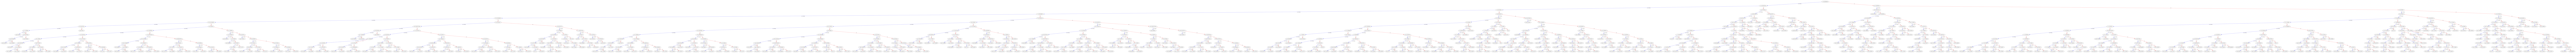

In [39]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [500, 100]
plt.savefig('feature.png')
plt.show()